# COMP5329 - Deep Learning
## Tutorial 3 - Optimization

**Semester 1, 2025**

**Objectives:**

* To learn about gradient descent optimization.
* To understand the algorithm of Momentum.
* To understand the algorithm of AdaGrad.
* To understand the algorithm of Adam. (Exercise)


**Instructions:**

* For more details about AdaGrad or Adam, please refer to Chapter 8 of Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. Cambridge, MA: MIT Press.

## 1. Objective function

**To evaluate characteristics of optimization algorithms, we choose a test function, a.k.a. artificial landscape.**

Beale function:
\begin{equation}
f(x_1,x_2)=(1.5−x_1+x_1x_2)^2+(2.25−x_1+x_1x_2^2)^2+(2.625−x_1+x_1x_2^3)^2
\end{equation}
The surface is plotted as follows

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Beale%27s_function.pdf/page1-1200px-Beale%27s_function.pdf.jpg" width=600 height=450></center>

[Image credit: Gaortizg]

The minimal location of this function is $(x_1,x_2) = (3,0.5)$.

We now proceed to optimize this objective function through different optimization methods.

### Objective is to minimize the Bealee function by updating x1 and x2

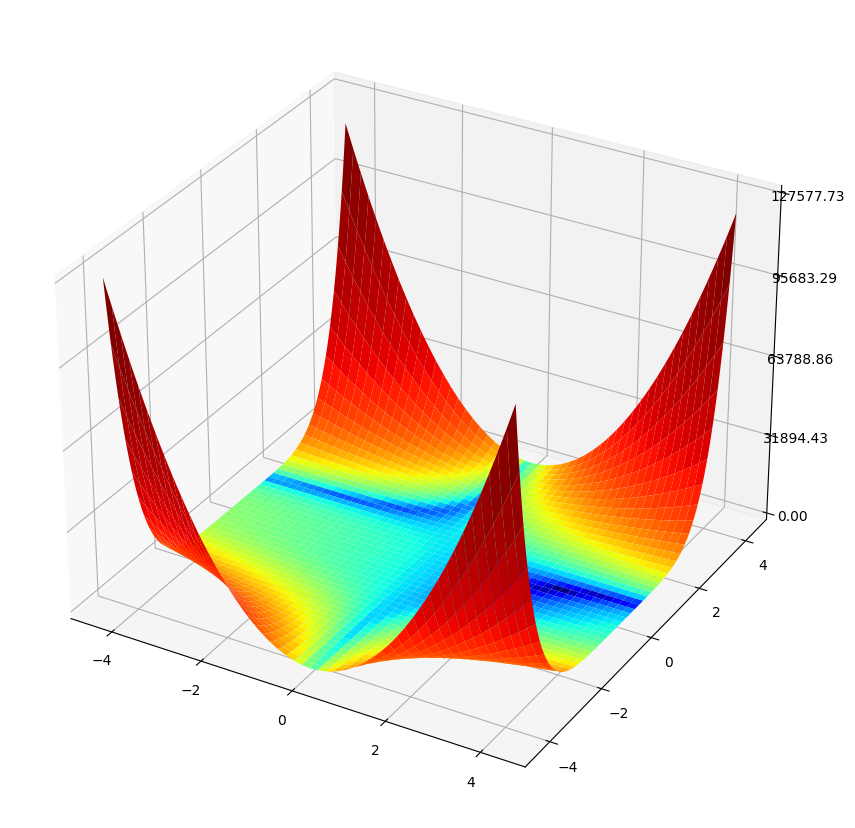

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as plt_cl
from matplotlib.ticker import LinearLocator
import numpy as np
from matplotlib.pyplot import figure
# import seaborn as sb

# sb.set_style('whitegrid')
# sb.set_style ("darkgrid")

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X1 = np.arange(-4.3, 4.3, 0.001)
X2 = np.arange(-4.3, 4.3, 0.001)
X1, X2 = np.meshgrid(X1, X2) # for creating the grid (the field for between coordinators)

# Z = np.power((1.5 - X1 + X1 * X2), 2)

Z = (1.5 - X1 + X1*X2)**2 + (2.25 - X1 + X1*X2**2)**2 + (2.625 - X1 + X1*X2**3)**2

# Plot the surface.
surf = ax.plot_surface(X1, X2, Z, cmap=cm.jet,
                       linewidth=0.2, antialiased=True, norm=plt_cl.LogNorm())



# Customize the z axis.
# ax.set_zlim(0, 200000)
ax.zaxis.set_major_locator(LinearLocator(5))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

fig_cfg = plt.gcf()
fig_cfg.set_size_inches(18.5, 10.5)
# fig.savefig('test2png.png', dpi=100)
plt.grid(False)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as plt_cl

In [ ]:
def beale(x1,x2):
    return (1.5 - x1 + x1*x2)**2 + (2.25 - x1 + x1*x2**2)**2 + (2.625 - x1 + x1*x2**3)**2
# (1.5 - x1 + x1*x2)^2
# 2 * ( 1.5 - x1 + x1 * x2) *(-1 + x2)

def dbeale_dx(x1, x2):
    dfdx1 = 2*(1.5 - x1 + x1*x2)*(x2-1) + 2*(2.25 - x1 + x1*x2**2)*(x2**2-1) + 2*(2.625 - x1 + x1*x2**3)*(x2**3-1)
    dfdx2 = 2*(1.5 - x1 + x1*x2)*x1 + 2*(2.25 - x1 + x1*x2**2)*(2*x1*x2) + 2*(2.625 - x1 + x1*x2**3)*(3*x1*x2**2)
    return dfdx1, dfdx2

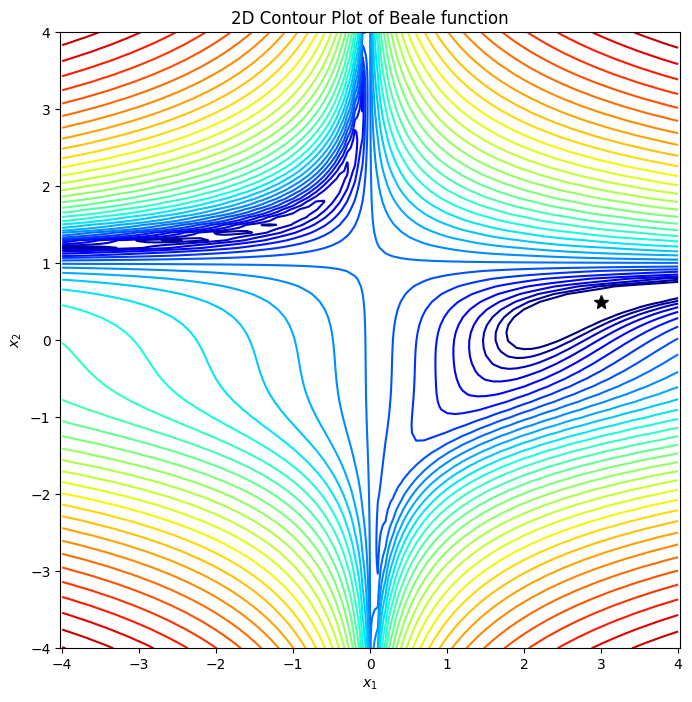

In [ ]:
step_x1, step_x2 = 0.1, 0.1
X1, X2 = np.meshgrid(np.arange(-4, 4+step_x1, step_x1), np.arange(-4, 4+step_x2, step_x2))
Y = beale(X1,X2)

plt.rcParams['figure.figsize'] = [8, 8]
plt.contour(X1, X2, Y, levels=np.logspace(0, 5, 35), norm=plt_cl.LogNorm(), cmap=plt.cm.jet)
plt.title('2D Contour Plot of Beale function')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.plot(3,0.5,'k*',markersize=10)
plt.show()

$$\theta = \theta - \eta * ∇ \theta $$

## 2. Momentum

In [ ]:
def gd_momentum(df_dx, x0, conf_para=None):

    if conf_para is None:
        conf_para = {}

    conf_para.setdefault('n_iter', 1000) #number of iterations
    conf_para.setdefault('learning_rate', 0.001) #learning rate
    conf_para.setdefault('momentum', 0.9) #momentum parameter

    x_traj = []
    x_traj.append(x0)
    v = np.zeros_like(x0) # init v_t as 0

    for iter in range(1, conf_para['n_iter']+1):
        dfdx = np.array(df_dx(x_traj[-1][0], x_traj[-1][1])) # derivative calculation
        v = conf_para['momentum']*v - conf_para['learning_rate']*dfdx # equation (1)
        x_traj.append(x_traj[-1]+v) # equation (2)

    return x_traj

The final solution is (x_1,x_2) = ( 3.2906784064202776 , 0.5659659204242713 )


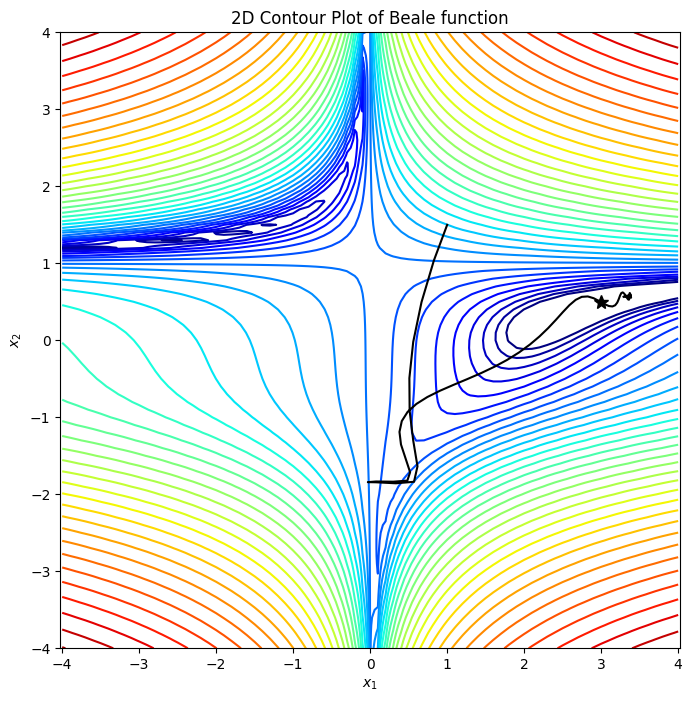

In [ ]:
x0 = np.array([1.0,1.5])
conf_para_momentum = {'n_iter':100,'learning_rate':0.005}
x_traj_momentum = gd_momentum(dbeale_dx, x0, conf_para_momentum)
print("The final solution is (x_1,x_2) = (",x_traj_momentum[-1][0],",",x_traj_momentum[-1][1],")")

plt.rcParams['figure.figsize'] = [8, 8]
plt.contour(X1, X2, Y, levels=np.logspace(0, 5, 35), norm=plt_cl.LogNorm(), cmap=plt.cm.jet)
plt.title('2D Contour Plot of Beale function')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.plot(3,0.5,'k*',markersize=10)
x_traj_momentum = np.array(x_traj_momentum)
plt.plot(x_traj_momentum[:,0],x_traj_momentum[:,1],'k-')
plt.show()

## 3. Nesterov accelerated gradient

In [ ]:
def gd_nesterov(df_dx, x0, conf_para=None):

    if conf_para is None:
        conf_para = {}

    conf_para.setdefault('n_iter', 1000) #number of iterations
    conf_para.setdefault('learning_rate', 0.001) #learning rate
    conf_para.setdefault('momentum', 0.9) #momentum parameter

    x_traj = []
    x_traj.append(x0)
    v = np.zeros_like(x0) # init v_t as 0

    for iter in range(1, conf_para['n_iter']+1):
        # big jump:
        x_jump = x_traj[-1] + v # main change
        dfdx = np.array(df_dx(x_jump[0], x_jump[1])) # derivative calculation
        v = conf_para['momentum']*v - conf_para['learning_rate']*dfdx # equation (4)
        x_traj.append(x_traj[-1]+v) # equation (5)

    return x_traj

The final solution is (x_1,x_2) = ( 3.1661701843742605 , 0.5386195366572595 )


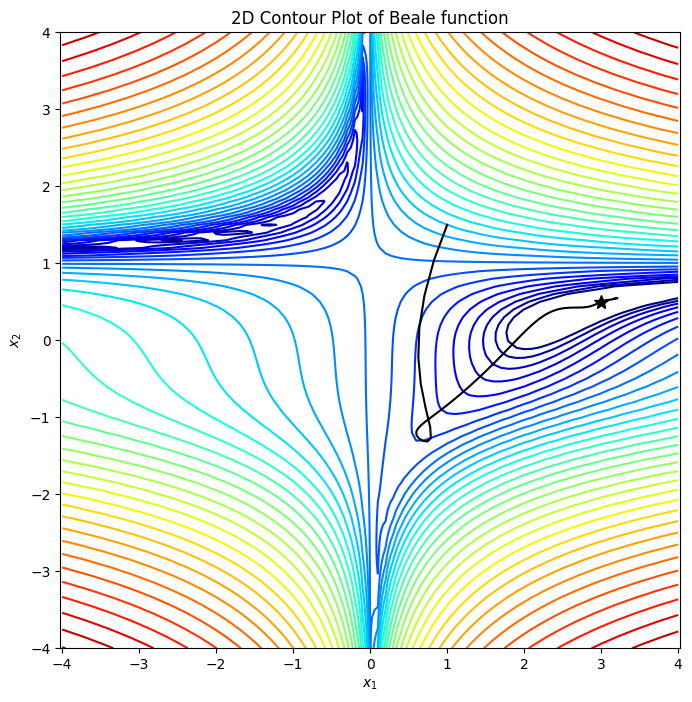

In [ ]:
x0 = np.array([1.0,1.5])
conf_para_momentum = {'n_iter':100,'learning_rate':0.005}
x_traj_momentum = gd_nesterov(dbeale_dx, x0, conf_para_momentum)
print("The final solution is (x_1,x_2) = (",x_traj_momentum[-1][0],",",x_traj_momentum[-1][1],")")

plt.rcParams['figure.figsize'] = [8, 8]
plt.contour(X1, X2, Y, levels=np.logspace(0, 5, 35), norm=plt_cl.LogNorm(), cmap=plt.cm.jet)
plt.title('2D Contour Plot of Beale function')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.plot(3,0.5,'k*',markersize=10)
x_traj_momentum = np.array(x_traj_momentum)
plt.plot(x_traj_momentum[:,0],x_traj_momentum[:,1],'k-')
plt.show()

The final solution is (x_1,x_2) = ( 3.0563238757928075 , 0.5137191875858732 )


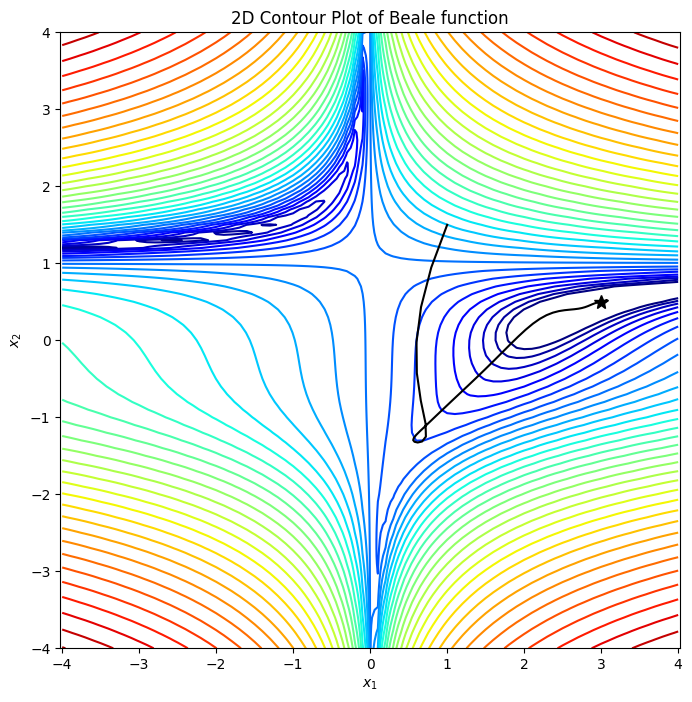

In [ ]:
x0 = np.array([1.0,1.5])
conf_para_momentum = {'n_iter':100,'learning_rate':0.006, 'momentum': 0.88}
x_traj_momentum = gd_nesterov(dbeale_dx, x0, conf_para_momentum)
print("The final solution is (x_1,x_2) = (",x_traj_momentum[-1][0],",",x_traj_momentum[-1][1],")")

plt.rcParams['figure.figsize'] = [8, 8]
plt.contour(X1, X2, Y, levels=np.logspace(0, 5, 35), norm=plt_cl.LogNorm(), cmap=plt.cm.jet)
plt.title('2D Contour Plot of Beale function')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.plot(3,0.5,'k*',markersize=10)
x_traj_momentum = np.array(x_traj_momentum)
plt.plot(x_traj_momentum[:,0],x_traj_momentum[:,1],'k-')
plt.show()

## 4. Adaptaive Learning Rate Methods

### 4.1 AdaGrad

In [ ]:
def gd_adagrad(df_dx, x0, conf_para=None):

    if conf_para is None:
        conf_para = {}

    conf_para.setdefault('n_iter', 1000) #number of iterations
    conf_para.setdefault('learning_rate', 0.001) #learning rate
    conf_para.setdefault('epsilon', 1e-7)

    x_traj = []
    x_traj.append(x0)
    r = np.zeros_like(x0)

    for iter in range(1, conf_para['n_iter']+1):
        dfdx = np.array(df_dx(x_traj[-1][0], x_traj[-1][1]))
        r += dfdx**2
        x_traj.append(x_traj[-1] - conf_para['learning_rate'] / (np.sqrt(r)+conf_para['epsilon']) * dfdx)

    return x_traj

The final solution is (x_1,x_2) = ( 2.9995825231039444 , 0.4998950151592335 )


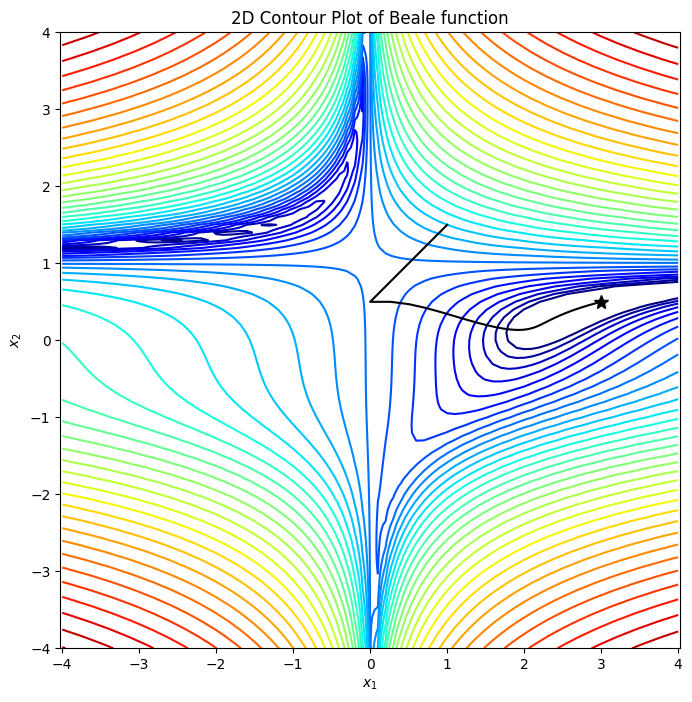

In [ ]:
x0 = np.array([1.0,1.5])
conf_para_adag = {'n_iter':1000,'learning_rate':1}
x_traj_adag = gd_adagrad(dbeale_dx, x0, conf_para_adag)
print("The final solution is (x_1,x_2) = (",x_traj_adag[-1][0],",",x_traj_adag[-1][1],")")

plt.rcParams['figure.figsize'] = [8, 8]
plt.contour(X1, X2, Y, levels=np.logspace(0, 5, 35), norm=plt_cl.LogNorm(), cmap=plt.cm.jet)
plt.title('2D Contour Plot of Beale function')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.plot(3,0.5,'k*',markersize=10)
x_traj_adag = np.array(x_traj_adag)
plt.plot(x_traj_adag[:,0],x_traj_adag[:,1],'k-')
plt.show()

### 4.2 RMSProp

In [ ]:
def gd_rmsprop(df_dx, x0, conf_para=None):

    if conf_para is None:
        conf_para = {}

    conf_para.setdefault('n_iter', 1000) #number of iterations
    conf_para.setdefault('learning_rate', 0.001) #learning rate
    conf_para.setdefault('epsilon', 1e-7)
    conf_para.setdefault('gamma', 0.9)
    x_traj = []
    x_traj.append(x0)
    r = np.zeros_like(x0)

    for iter in range(1, conf_para['n_iter']+1):
        dfdx = np.array(df_dx(x_traj[-1][0], x_traj[-1][1]))
        r =  conf_para['gamma'] * r + (1 - conf_para['gamma']) * (dfdx**2) # main change
        x_traj.append(x_traj[-1] - conf_para['learning_rate'] / (np.sqrt(r)+conf_para['epsilon']) * dfdx)

    return x_traj

The final solution is (x_1,x_2) = ( 2.7707105053577137 , 0.4399968854511787 )


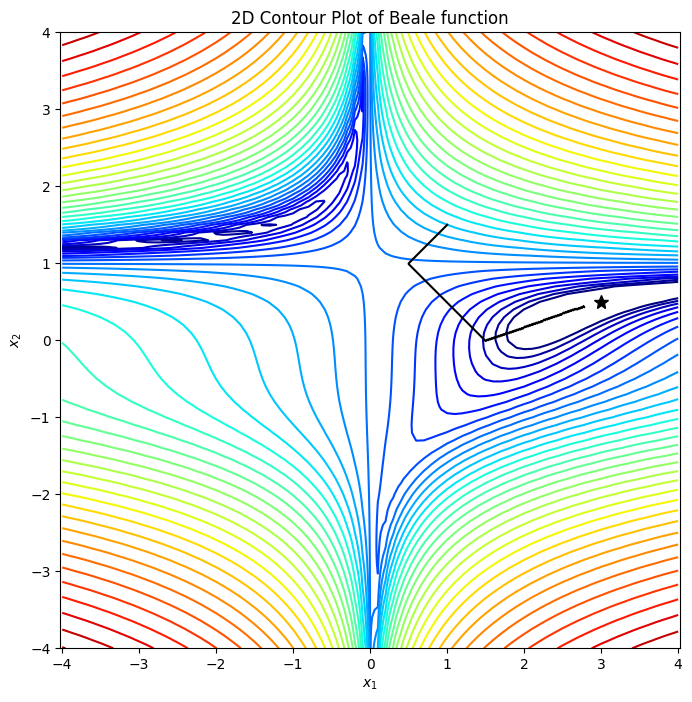

In [ ]:
x0 = np.array([1.0,1.5])
conf_para_adag = {'n_iter':1000,'learning_rate':0.01, 'gamma':0.9}
x_traj_adag = gd_rmsprop(dbeale_dx, x0, conf_para_adag)
print("The final solution is (x_1,x_2) = (",x_traj_adag[-1][0],",",x_traj_adag[-1][1],")")

plt.rcParams['figure.figsize'] = [8, 8]
plt.contour(X1, X2, Y, levels=np.logspace(0, 5, 35), norm=plt_cl.LogNorm(), cmap=plt.cm.jet)
plt.title('2D Contour Plot of Beale function')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.plot(3,0.5,'k*',markersize=10)
x_traj_adag = np.array(x_traj_adag)
plt.plot(x_traj_adag[:,0],x_traj_adag[:,1],'k-')
plt.show()

### 4.3 Adam

In [ ]:
def gd_adam(df_dx, x0, conf_para=None):

    if conf_para is None:
        conf_para = {}

    conf_para.setdefault('n_iter', 1000) #number of iterations
    conf_para.setdefault('learning_rate', 0.001) #learning rate
    conf_para.setdefault('rho1', 0.9)
    conf_para.setdefault('rho2', 0.999)
    conf_para.setdefault('epsilon', 1e-8)

    x_traj = []
    x_traj.append(x0)
    t = 0
    s = np.zeros_like(x0)
    r = np.zeros_like(x0)

    for iter in range(1, conf_para['n_iter']+1):
        dfdx = np.array(df_dx(x_traj[-1][0], x_traj[-1][1]))
        t += 1
        s = conf_para['rho1']*s + (1-conf_para['rho1'])*dfdx # step 1
        r = conf_para['rho2']*r + (1-conf_para['rho2'])*(dfdx**2) # step 2
        st = s / (1-conf_para['rho1']**t) # step 3
        rt = r / (1-conf_para['rho2']**t) # step 3

        x_traj.append(x_traj[-1] - conf_para['learning_rate'] * st / (np.sqrt(rt)+conf_para['epsilon'])) # step 4

    return x_traj

The final solution is (x_1,x_2) = ( 2.9745025347882477 , 0.49352422780278987 )


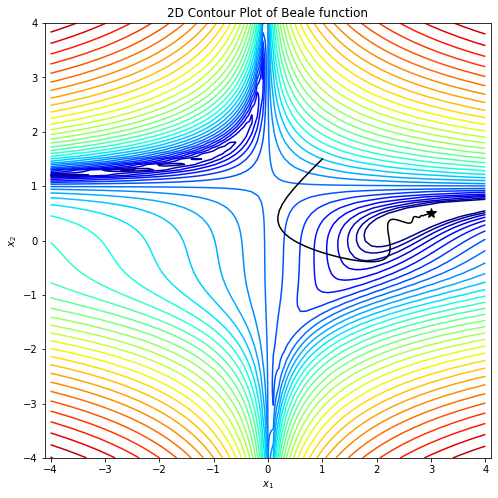

In [ ]:
x0 = np.array([1.0,1.5])
conf_para_adam = {'n_iter':200,'learning_rate':0.2}
x_traj_adam = gd_adam(dbeale_dx, x0, conf_para_adam)
print("The final solution is (x_1,x_2) = (",x_traj_adam[-1][0],",",x_traj_adam[-1][1],")")

plt.rcParams['figure.figsize'] = [8, 8]
plt.contour(X1, X2, Y, levels=np.logspace(0, 5, 35), norm=plt_cl.LogNorm(), cmap=plt.cm.jet)
plt.title('2D Contour Plot of Beale function')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.plot(3,0.5,'k*',markersize=10)
x_traj_adam = np.array(x_traj_adam)
plt.plot(x_traj_adam[:,0],x_traj_adam[:,1],'k-')
plt.show()